<h1 align="center"><b>CS116.M11 - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>SUPPORT VECTOR REGRESSION</b></h1>

# **Thông tin nhóm**

1. ***19520227 - Nguyễn Ngọc Lan Phương - 19520227@gm.uit.edu.vn*** 
2. ***19520214 - Cao Hưng Phú - 19520214@gm.uit.edu.vn*** 
3. ***19521216 - Trần Huỳnh Kỳ Anh - 19521216@gm.uit.edu.vn*** 

# **Thông tin bộ dữ liệu**

1. ***Tên bộ dữ liệu:*** Red Wine Quality Dataset - Chất lượng rượu vang đỏ
2. ***Tác giả bộ dữ liệu:*** P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
3. ***Số lượng dòng:*** 1599 dòng
4. ***Nguồn:*** [uci.edu](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), [dx.doi.org](http://dx.doi.org/10.1016/j.dss.2009.05.016), [data.world](https://data.world/uci/wine-quality)

# **Bài làm**

#### **Khai báo cơ bản**

In [1]:
#Define Dataset
dataset_fileName = "winequality-red.csv"
dataset_id = "1-FYNAF8iP6aT5T-lN1wWdpJiEJjDJeG4"
dataset_path = "/content/" + dataset_fileName

#### **Thư viện cơ bản**

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **1. Tải và đọc dataset**

In [3]:
!gdown -O $dataset_path --id $dataset_id

Downloading...
From: https://drive.google.com/uc?id=1-FYNAF8iP6aT5T-lN1wWdpJiEJjDJeG4
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 30.8MB/s]


In [4]:
dataset = pd.read_csv(dataset_path, sep=';', encoding='latin-1')

In [5]:
print("Shape:", dataset.shape)
dataset.head(5)

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **2. Phân tích và tiền xử lý dữ liệu**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

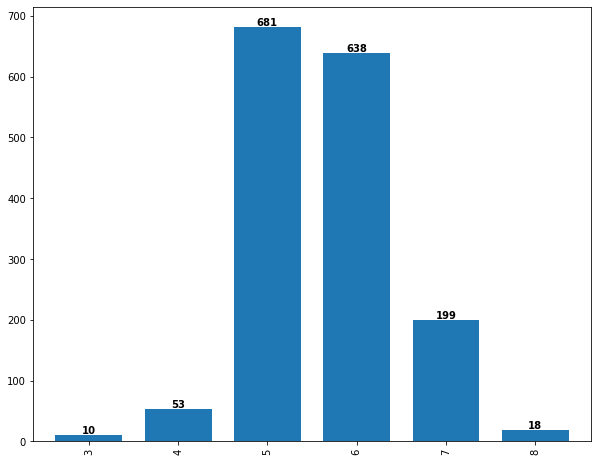

In [8]:
plt.figure(figsize=(10, 8))
y_ax = np.array(dataset['quality'].value_counts().sort_index())
ax = dataset['quality'].value_counts().sort_index().plot.bar(width = 0.75)

for i, v in enumerate(y_ax):
  plt.text(x = i, y = v, s = str(v), ha='center', va='bottom', weight='bold')

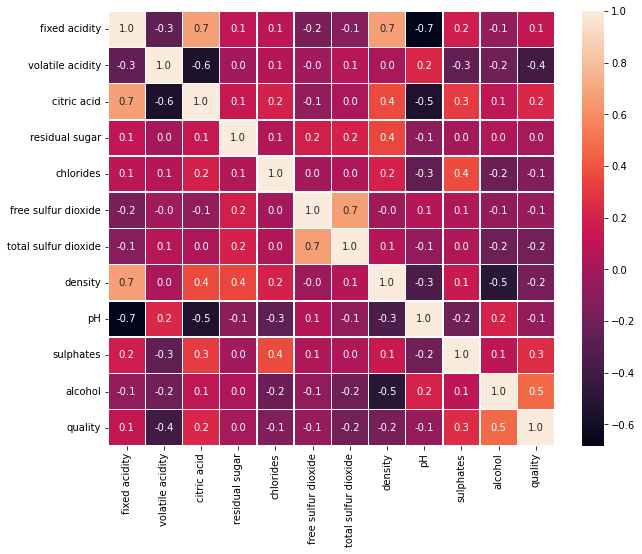

In [9]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5, fmt= '.1f',ax=ax)

In [11]:
X_data = dataset[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y_data = dataset['quality']

In [12]:
X = np.array(X_data)
y = np.array(y_data)

## **3. Chia dữ liệu theo tỉ lệ 8:2**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (1279, 9)
Shape X_test: (320, 9)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3. Hàm đánh giá**

In [79]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def mse_custom_scoring(y_true, y_predict):
  return mean_squared_error(y_true, y_predict)

MSE_scoring = make_scorer(mse_custom_scoring, greater_is_better=False)

In [104]:
def getResult(y_true, y_predict):
  res_mse = mean_squared_error(y_true, y_predict)
  print("Mean Square Error:", res_mse)

In [105]:
def visualizeResult(y_true, y_predict, num_test_show = 30):
  plt.figure(figsize=(12, 12))
  x = [i for i in range(len(y_true[:num_test_show]))]
  plt.plot(x, y_true[:num_test_show], label='y_true', color='b')
  plt.plot(x, y_predict[:num_test_show], label='y_predict', color='r')
  plt.legend(loc="upper left")
  plt.xlabel("Test")
  plt.ylabel("Quality")
  plt.title('Visualize {} tests in test dataset'.format(num_test_show))
  plt.show()

## **4. Thử trên các mô hình**

In [106]:
def predictModel(model):
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  getResult(y_test, y_predict)
  visualizeResult(y_test, y_predict)

### **4.1. Support Vector Regression**

Params default: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Mean Square Error: 0.34370408769284494


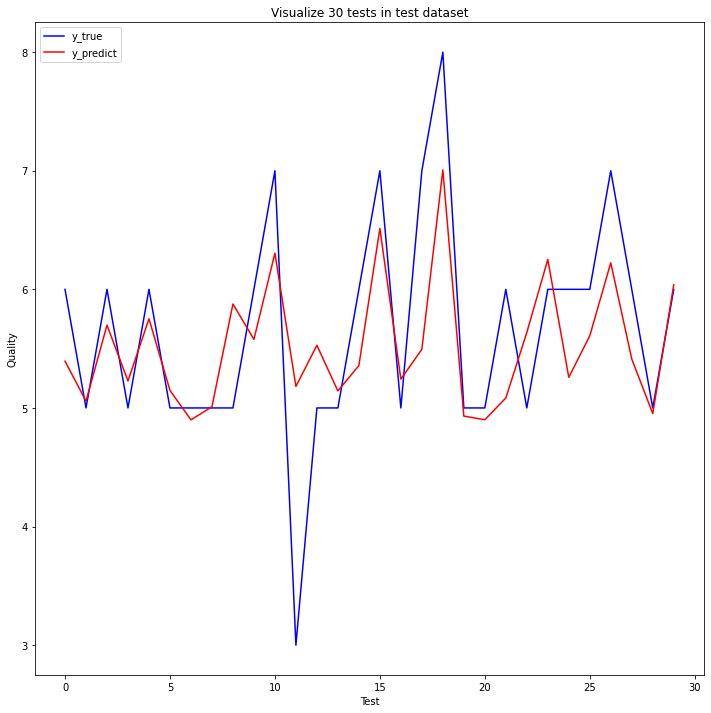

In [107]:
from sklearn.svm import SVR
modelSVR = SVR()
print("Params default:", modelSVR.get_params())
predictModel(modelSVR)

### **4.2. Linear Regression**

Params default: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Mean Square Error: 0.3892648517192504


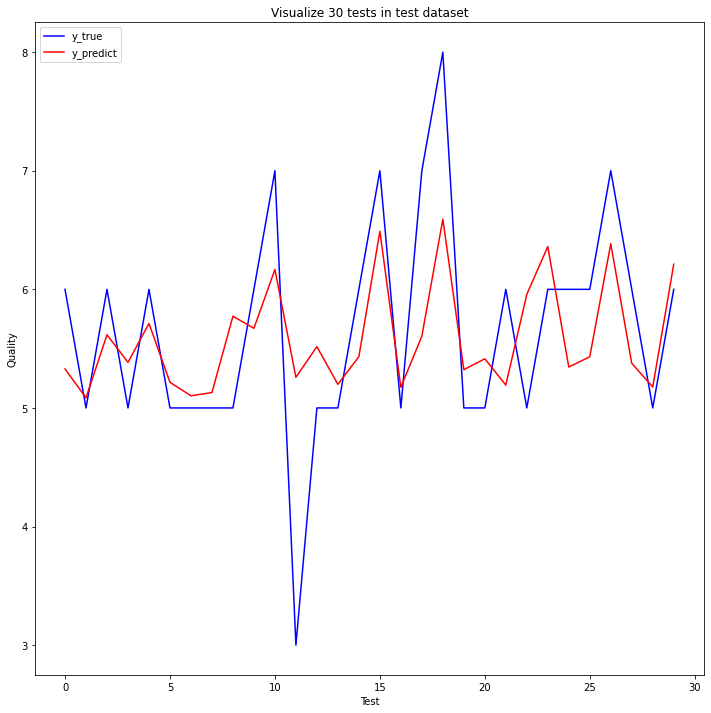

In [108]:
from sklearn.linear_model import LinearRegression
modelLinearR = LinearRegression()
print("Params default:", modelLinearR.get_params())
predictModel(modelLinearR)

### **4.3. Logistic Regression**

Params default: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Mean Square Error: 0.5


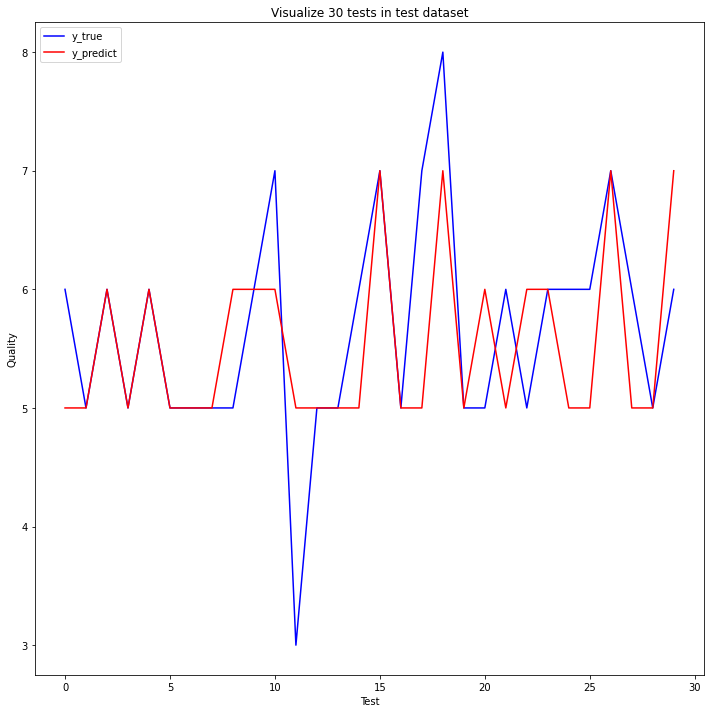

In [109]:
from sklearn.linear_model import LogisticRegression
modelLogisticR = LogisticRegression()
print("Params default:", modelLogisticR.get_params())
predictModel(modelLogisticR)

### **4.4. Support Vector Classification**

Params default: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Mean Square Error: 0.465625


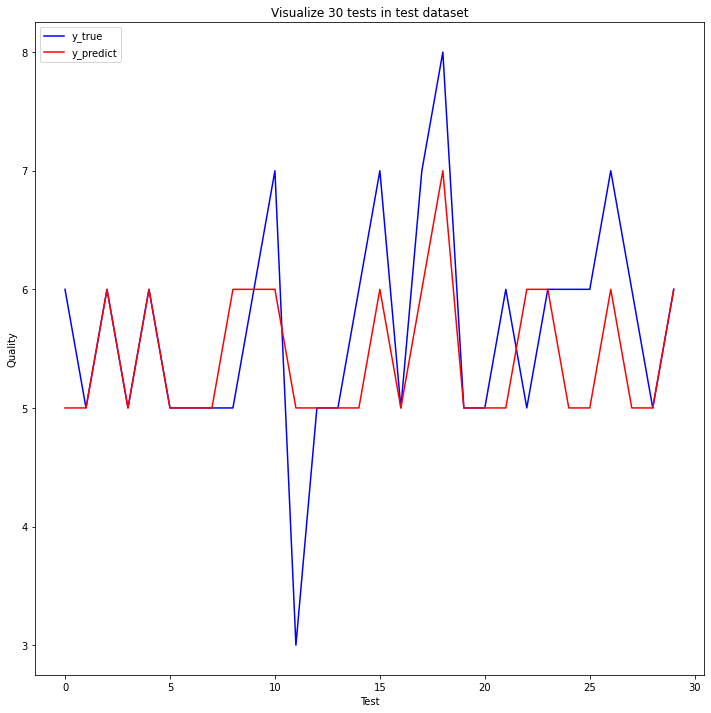

In [110]:
from sklearn.svm import SVC
modelSVC = SVC()
print("Params default:", modelSVC.get_params())
predictModel(modelSVC)

### **4.5. Ridge**

Params default: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Mean Square Error: 0.3892871084831854


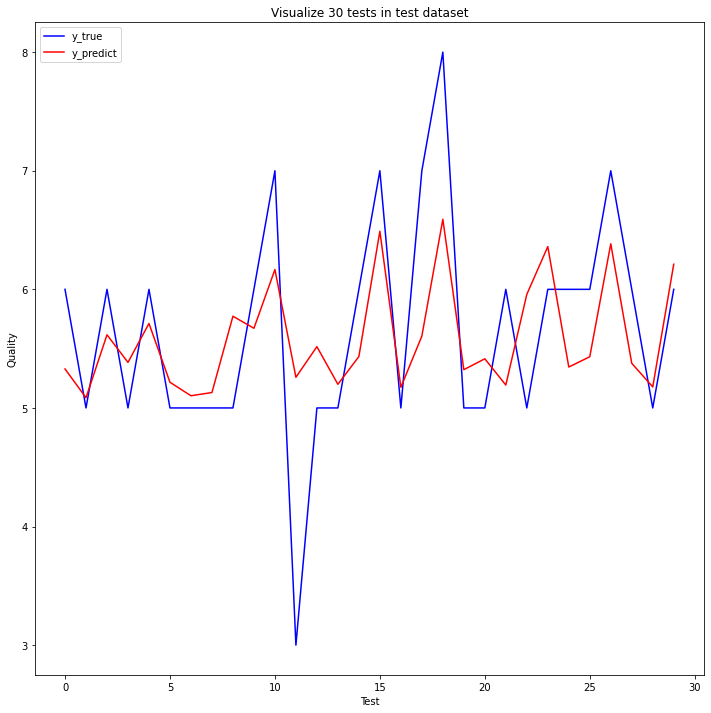

In [111]:
from sklearn.linear_model import Ridge
modelRidge = Ridge()
print("Params default:", modelRidge.get_params())
predictModel(modelRidge)

### **4.6. Lasso**

Params default: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Mean Square Error: 0.6571600689645265


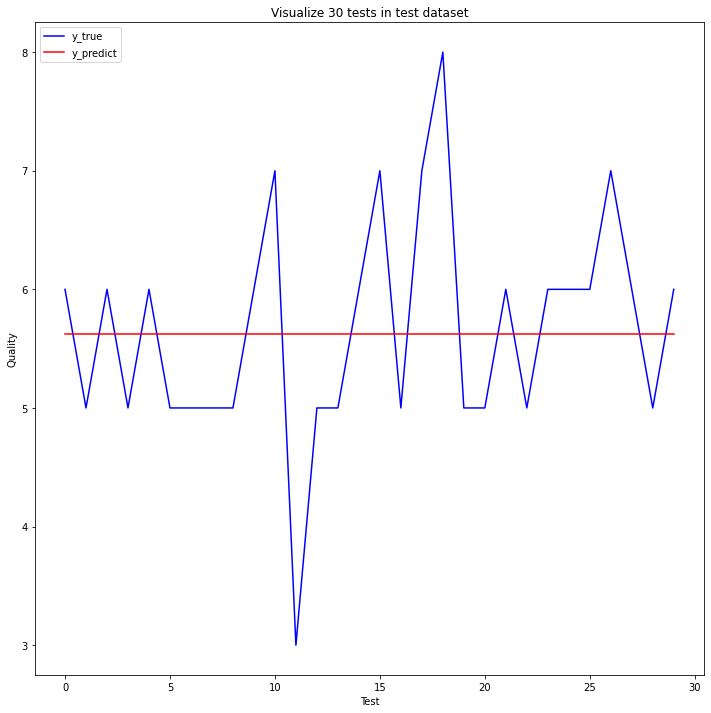

In [112]:
from sklearn.linear_model import Lasso
modelLasso = Lasso()
print("Params default:", modelLasso.get_params())
predictModel(modelLasso)

## **5. Support Vector Regression Turning**

In [25]:
list_c = [0.1, 1.0, 10.0, 100.0]
list_epsilon = [0.0, 0.01, 0.1, 0.3, 0.5]
list_kernel =  ['poly', 'rbf', 'linear', 'sigmoid']
list_gamma = [0.1, 0.01, 0.001, 0.0001]
list_degree =  [1, 2, 3, 4]
list_coef0 = [0.0, 0.1, 0.3, 0.5, 1]

In [26]:
def predictModelandvisualize(model):
  y_predict = model.predict(X_test)
  getResult(y_test, y_predict)
  visualizeResult(y_test, y_predict)

### **5.1. Sử dụng vòng lặp for**

In [28]:
for_best_param = {
    'kernel': None,
    'C': None, 
    'epsilon': None,
    'gamma': None
}

for_best_mse = 1

modelForSearch = None

In [29]:
import time
from sklearn.metrics import mean_squared_error

temp_best_param = {
    'kernel': None,
    'C': None, 
    'epsilon': None,
    'gamma': None
}


for kernel in list_kernel:
  for C in list_c:
    for epsilon in list_epsilon:
      for gamma in list_gamma:
        temp_param = {
            'kernel': kernel,
            'C': C, 
            'epsilon': epsilon,
            'gamma': gamma
        }
        print("[=> Config: ", temp_param)
        model = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)
        start_time = time.time()
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        temp_mse = mean_squared_error(y_test, y_predict)
        print("-> MSE:", temp_mse)
        print("-> Time: {:.4f}s".format(time.time() - start_time))
        if temp_mse < for_best_mse:
          for_best_param = temp_param
          for_best_mse = temp_mse
          modelForSearch = model
        print("============================================")
    

[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.0, 'gamma': 0.1}
-> MSE: 0.4517530251204815
-> Time: 0.1170s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.0, 'gamma': 0.01}
-> MSE: 0.746616174640226
-> Time: 0.0896s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.0, 'gamma': 0.001}
-> MSE: 0.7531098234791245
-> Time: 0.0828s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.0, 'gamma': 0.0001}
-> MSE: 0.7531249848226548
-> Time: 0.0777s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.01, 'gamma': 0.1}
-> MSE: 0.4521467912081601
-> Time: 0.1055s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.01, 'gamma': 0.01}
-> MSE: 0.7405442324636137
-> Time: 0.0789s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.01, 'gamma': 0.001}
-> MSE: 0.7469051351420907
-> Time: 0.0863s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.01, 'gamma': 0.0001}
-> MSE: 0.7469124926345811
-> Time: 0.0816s
[=> Config:  {'kernel': 'poly', 'C': 0.1, 'epsilon': 0.1,

In [30]:
print("Best Parameters:", for_best_param)
print("Best MSE:", for_best_mse)

Best Parameters: {'kernel': 'rbf', 'C': 1.0, 'epsilon': 0.3, 'gamma': 0.1}
Best MSE: 0.34236697613869793


Mean Square Error: 0.34236697613869793


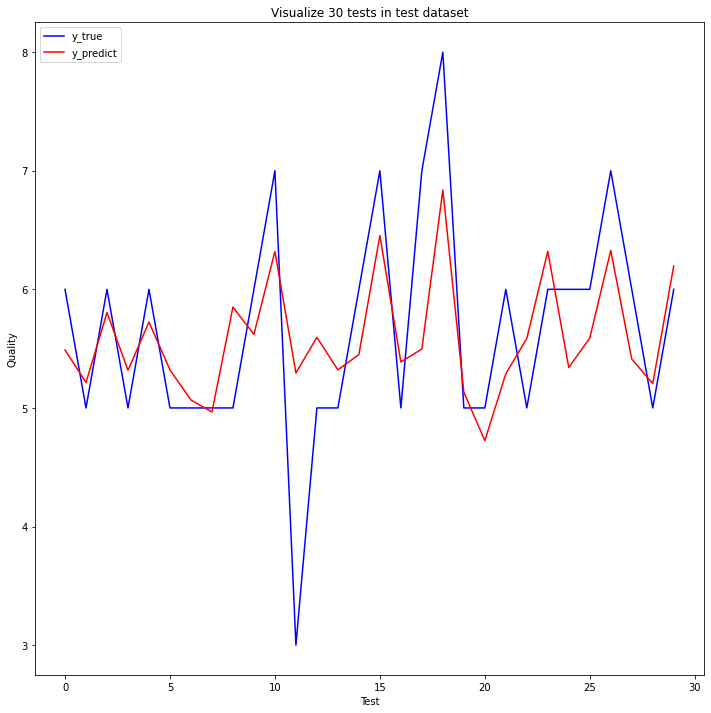

In [113]:
predictModelandvisualize(modelForSearch)

### **5.2. Sử dụng Grid Search**

In [98]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

tuned_parameters = [
    {"kernel": ["rbf", "linear"], "C": list_c, "epsilon": list_epsilon, "gamma": list_gamma},
    {"kernel": ["poly"], "C": list_c, "epsilon": list_epsilon, "gamma": list_gamma, "degree": list_degree, "coef0": list_coef0},
    {"kernel": ["sigmoid"], "C": list_c, "epsilon": list_epsilon, "gamma": list_gamma, "coef0": list_coef0}
]

In [99]:
from sklearn.model_selection import GridSearchCV

modelGridSearch = GridSearchCV(SVR(), tuned_parameters, scoring=MSE_scoring, verbose=3)
modelGridSearch.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.1, kernel=poly;, score=-0.610 total time=   1.8s
[CV 2/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.1, kernel=poly;, score=-1.969 total time=   1.6s
[CV 3/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.1, kernel=poly;, score=-0.876 total time=   1.5s
[CV 4/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.1, kernel=poly;, score=-1.714 total time=   1.3s
[CV 5/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.1, kernel=poly;, score=-0.403 total time=   1.8s
[CV 1/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.01, kernel=poly;, score=-0.477 total time=   0.1s
[CV 2/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.01, kernel=poly;, score=-0.482 total time=   0.1s
[CV 3/5] END C=10.0, coef0=0.3, degree=3, epsilon=0.0, gamma=0.01, kernel=poly;, score=-0.511 total time=   0.1s
[CV 4/5] END C=10.0, coef0=0.3, degree=3, epsilon=

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [0.1, 1.0, 10.0, 100.0],
                          'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear']},
                         {'C': [0.1, 1.0, 10.0, 100.0],
                          'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                          'degree': [1, 2, 3, 4],
                          'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly']},
                         {'C': [0.1, 1.0, 10.0, 100.0],
                          'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                          'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['sigmoid']}],
             scoring=make_scorer(mse_custom_scoring, greater_is_better=False),
             ve

In [100]:
print("Best params:", modelGridSearch.best_params_)

Best params: {'C': 1.0, 'epsilon': 0.3, 'gamma': 0.1, 'kernel': 'rbf'}


Mean Square Error: 0.34236697613869793


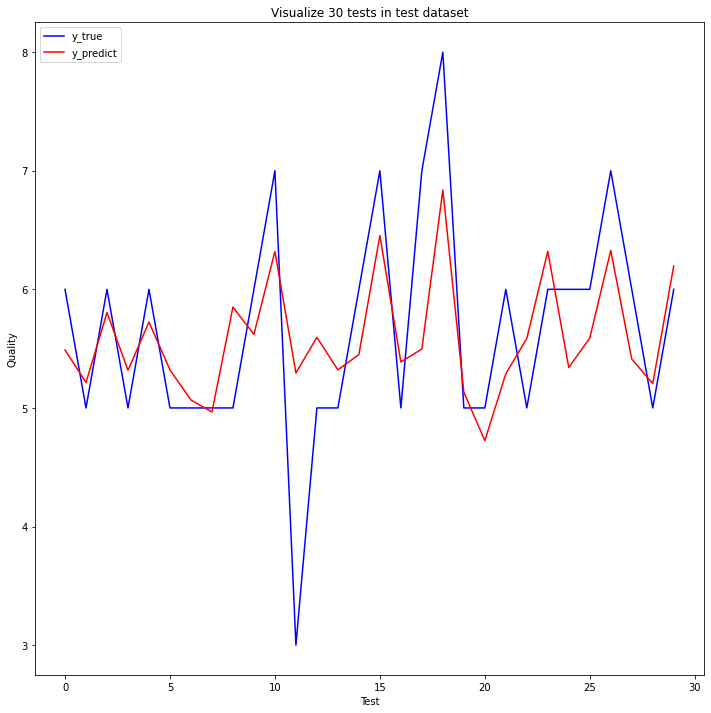

In [114]:
predictModelandvisualize(modelGridSearch)

### **5.3. Sử dụng Random Search**

In [80]:
from sklearn.model_selection import RandomizedSearchCV

modelRandomSearch = RandomizedSearchCV(SVR(), tuned_parameters, scoring=MSE_scoring, verbose=3)
modelRandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=10.0, coef0=1, degree=3, epsilon=0.5, gamma=0.0001, kernel=poly;, score=-0.484 total time=   0.0s
[CV 2/5] END C=10.0, coef0=1, degree=3, epsilon=0.5, gamma=0.0001, kernel=poly;, score=-0.506 total time=   0.0s
[CV 3/5] END C=10.0, coef0=1, degree=3, epsilon=0.5, gamma=0.0001, kernel=poly;, score=-0.469 total time=   0.0s
[CV 4/5] END C=10.0, coef0=1, degree=3, epsilon=0.5, gamma=0.0001, kernel=poly;, score=-0.467 total time=   0.0s
[CV 5/5] END C=10.0, coef0=1, degree=3, epsilon=0.5, gamma=0.0001, kernel=poly;, score=-0.375 total time=   0.0s
[CV 1/5] END C=1.0, coef0=0.3, degree=2, epsilon=0.3, gamma=0.001, kernel=poly;, score=-0.503 total time=   0.0s
[CV 2/5] END C=1.0, coef0=0.3, degree=2, epsilon=0.3, gamma=0.001, kernel=poly;, score=-0.529 total time=   0.0s
[CV 3/5] END C=1.0, coef0=0.3, degree=2, epsilon=0.3, gamma=0.001, kernel=poly;, score=-0.527 total time=   0.0s
[CV 4/5] END C=1.0, coef0=0.3, degr

RandomizedSearchCV(estimator=SVR(),
                   param_distributions=[{'C': [0.1, 1.0, 10.0, 100.0],
                                         'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                                         'kernel': ['rbf', 'linear']},
                                        {'C': [0.1, 1.0, 10.0, 100.0],
                                         'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                                         'degree': [1, 2, 3, 4],
                                         'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                                         'kernel': ['poly']},
                                        {'C': [0.1, 1.0, 10.0, 100.0],
                                         'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                                         'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
       

In [89]:
print("Best params:", modelRandomSearch.best_params_)

Best params: {'kernel': 'poly', 'gamma': 0.001, 'epsilon': 0.3, 'degree': 4, 'coef0': 1, 'C': 1.0}


Mean Square Error: 0.39794209764125943


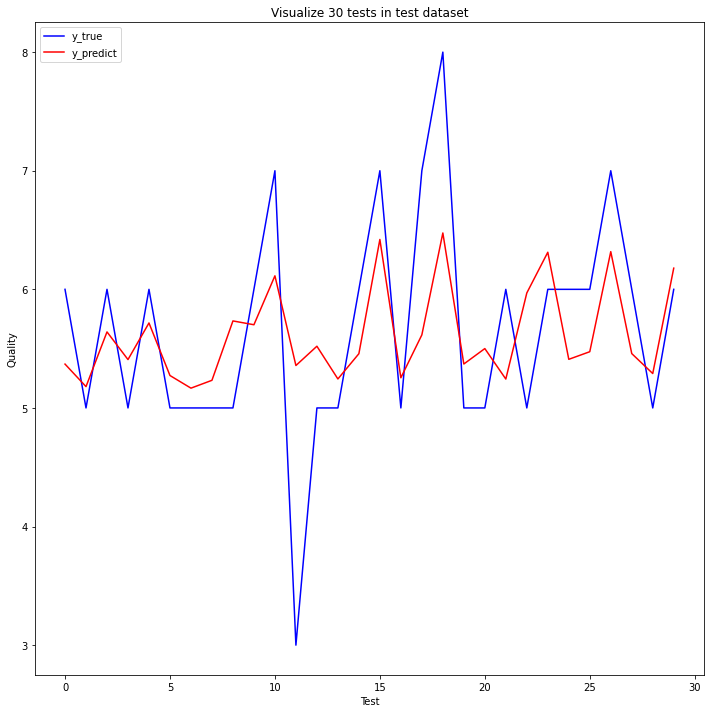

In [115]:
predictModelandvisualize(modelRandomSearch)

### **5.4. Sử dụng Bayes Optimization**

In [85]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.0 MB/s 


In [92]:
from skopt import BayesSearchCV

modelBayesSearch = BayesSearchCV(SVR(), tuned_parameters, scoring=MSE_scoring, verbose=3)
modelBayesSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.01, kernel=linear;, score=-0.480 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.01, kernel=linear;, score=-0.480 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.01, kernel=linear;, score=-0.491 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.01, kernel=linear;, score=-0.441 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.01, kernel=linear;, score=-0.327 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=100.0, epsilon=0.1, gamma=0.001, kernel=linear;, score=-0.478 total time=   5.1s
[CV 2/5] END C=100.0, epsilon=0.1, gamma=0.001, kernel=linear;, score=-0.479 total time=   4.3s
[CV 3/5] END C=100.0, epsilon=0.1, gamma=0.001, kernel=linear;, score=-0.491 total time=   4.8s
[CV 4/5] END C=100.0, epsilon=0.1, gamma=0.001, kernel=linear;, score=-0.442 total time=   4.8s
[CV 5/5] END C=100.0, epsilo

BayesSearchCV(estimator=SVR(),
              scoring=make_scorer(mse_custom_scoring, greater_is_better=False),
              search_spaces=[{'C': [0.1, 1.0, 10.0, 100.0],
                              'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                              'gamma': [0.1, 0.01, 0.001, 0.0001],
                              'kernel': ['rbf', 'linear']},
                             {'C': [0.1, 1.0, 10.0, 100.0],
                              'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                              'degree': [1, 2, 3, 4],
                              'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                              'gamma': [0.1, 0.01, 0.001, 0.0001],
                              'kernel': ['poly']},
                             {'C': [0.1, 1.0, 10.0, 100.0],
                              'coef0': [0.0, 0.1, 0.3, 0.5, 1],
                              'epsilon': [0.0, 0.01, 0.1, 0.3, 0.5],
                              'gamma': [0.1, 0.01, 0.001, 0.0001],
        

In [96]:
print("Best params:", modelBayesSearch.best_params_)

Best params: OrderedDict([('C', 1.0), ('epsilon', 0.3), ('gamma', 0.1), ('kernel', 'rbf')])


Mean Square Error: 0.34236697613869793


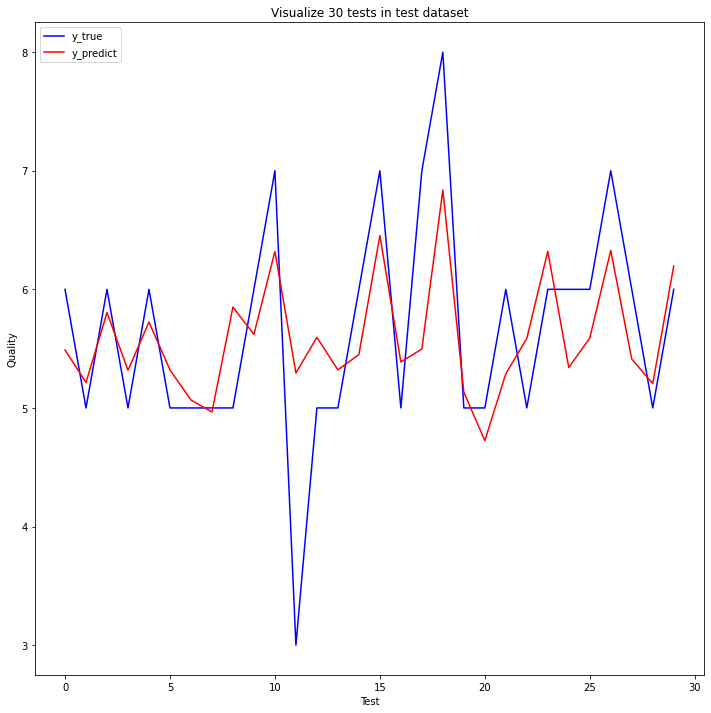

In [116]:
predictModelandvisualize(modelBayesSearch)